In [1]:
library(reshape2)
library(lubridate)
library(tseries)
library(MASS,stats)
library(car)

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: carData



In [2]:
data <- read.csv("SP500_e.csv")
head(data)

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,20060103,0.016341,0.016340,0.015027,0.015023,11699545700,500,11540511600,500,1268.80,0.016430
2,20060104,0.003931,0.003736,0.006375,0.006284,11740829600,499,11697131300,499,1273.46,0.003673
3,20060105,0.000028,0.000021,0.000621,0.000611,11745619900,500,11745378700,500,1273.48,0.000016
4,20060106,0.009559,0.009322,0.010100,0.009988,11855262700,500,11745619900,500,1285.45,0.009399
5,20060109,0.003710,0.003708,0.005676,0.005673,11899300800,500,11855262700,500,1290.15,0.003656
6,20060110,-0.000340,-0.000394,0.000430,0.000379,11894617400,500,11899300800,500,1289.69,-0.000357


In [3]:
Ret <- data$sprtrn
dates <- ymd(data$caldt)

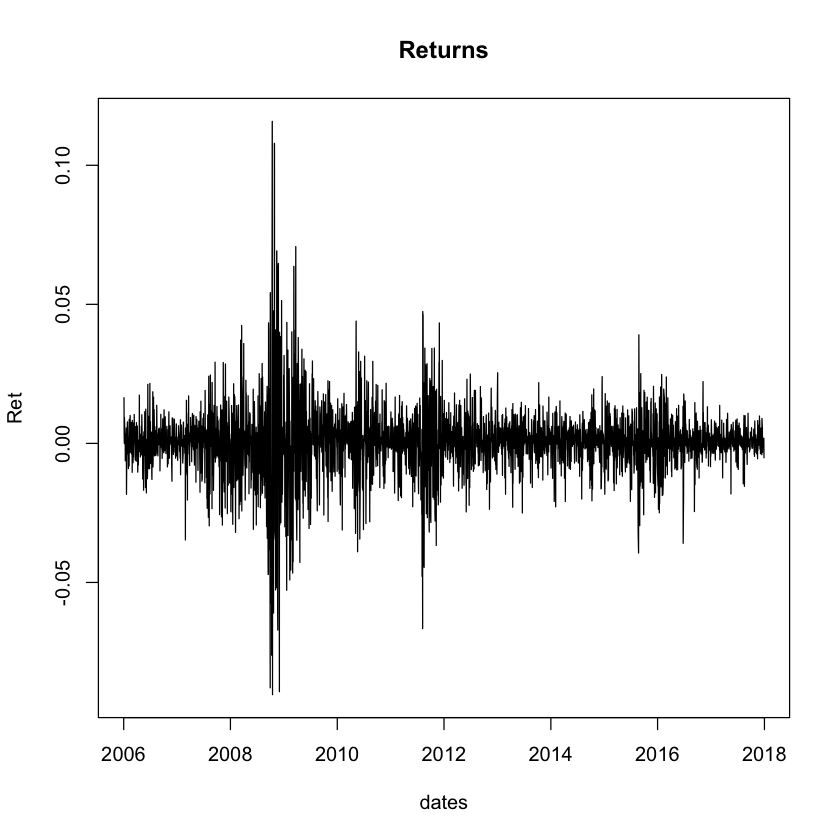

In [4]:
plot(dates, Ret, type = "l", main = "Returns")
# plot(Y$date, Y$JPM, type = "l", main = "Compound returns for JP Morgan", 
#     ylab = "Returns", xlab = "Date", col = "red")

In [5]:
tseries::jarque.bera.test(Ret)


	Jarque Bera Test

data:  Ret
X-squared = 17571, df = 2, p-value < 2.2e-16


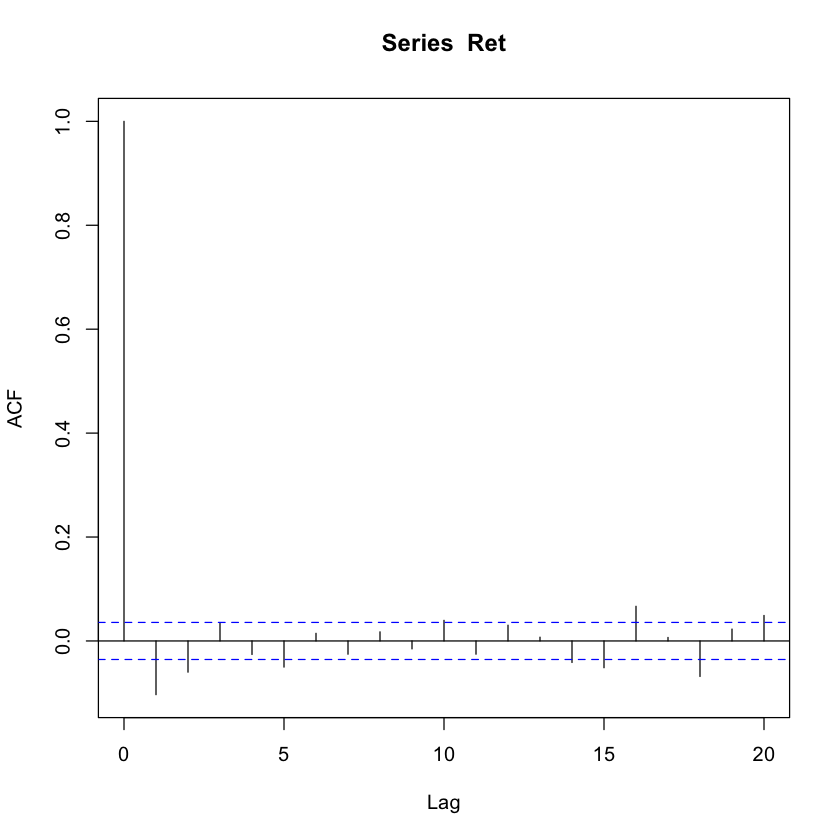

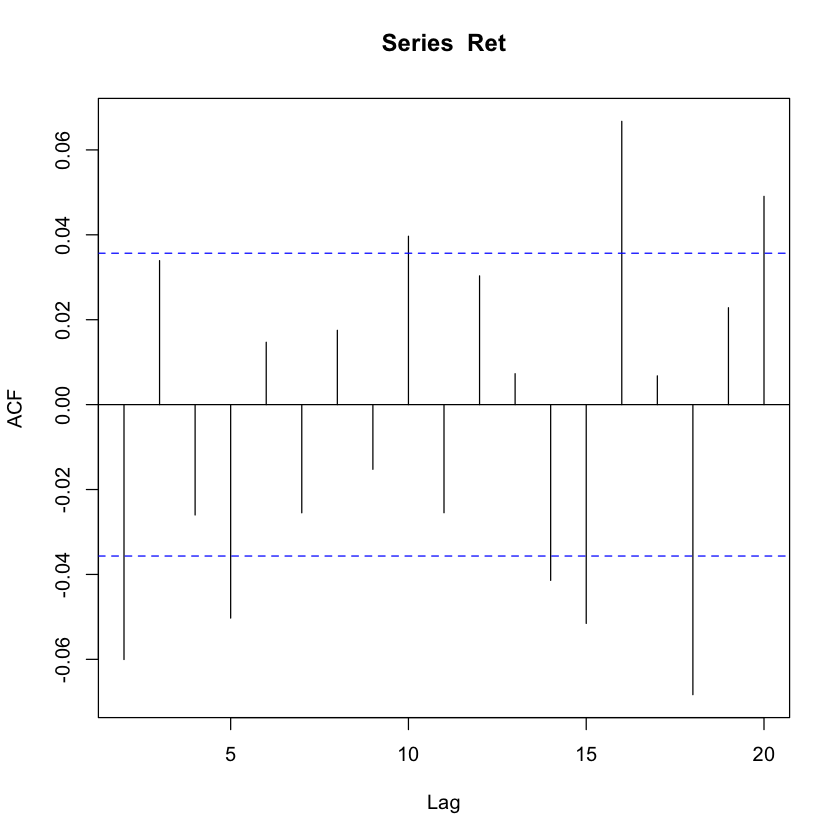

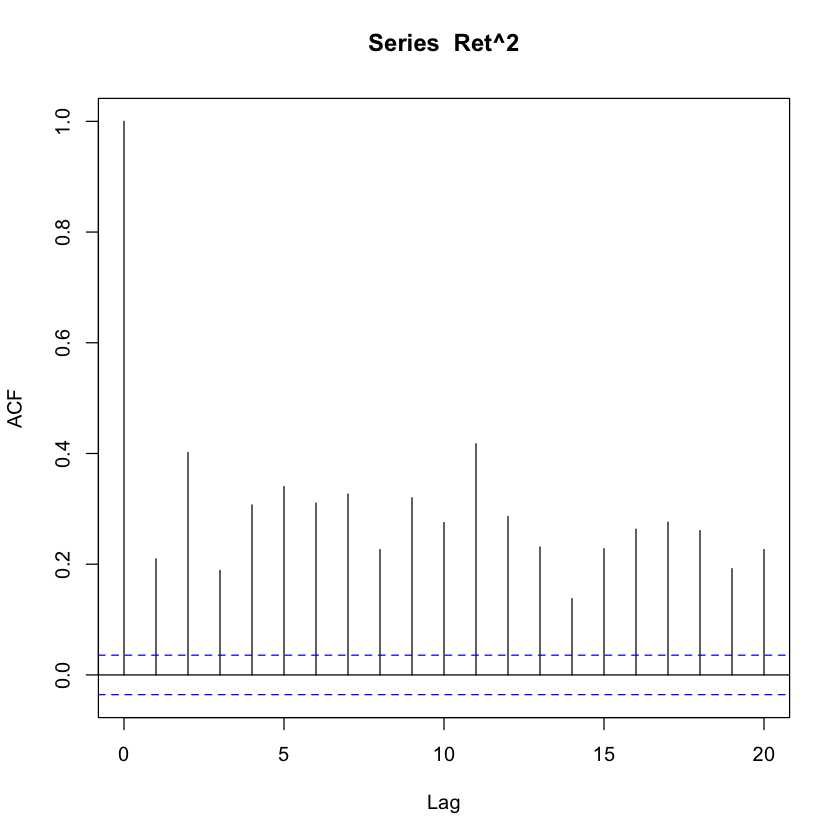


	Box-Ljung test

data:  Ret
X-squared = 127.95, df = 21, p-value < 2.2e-16



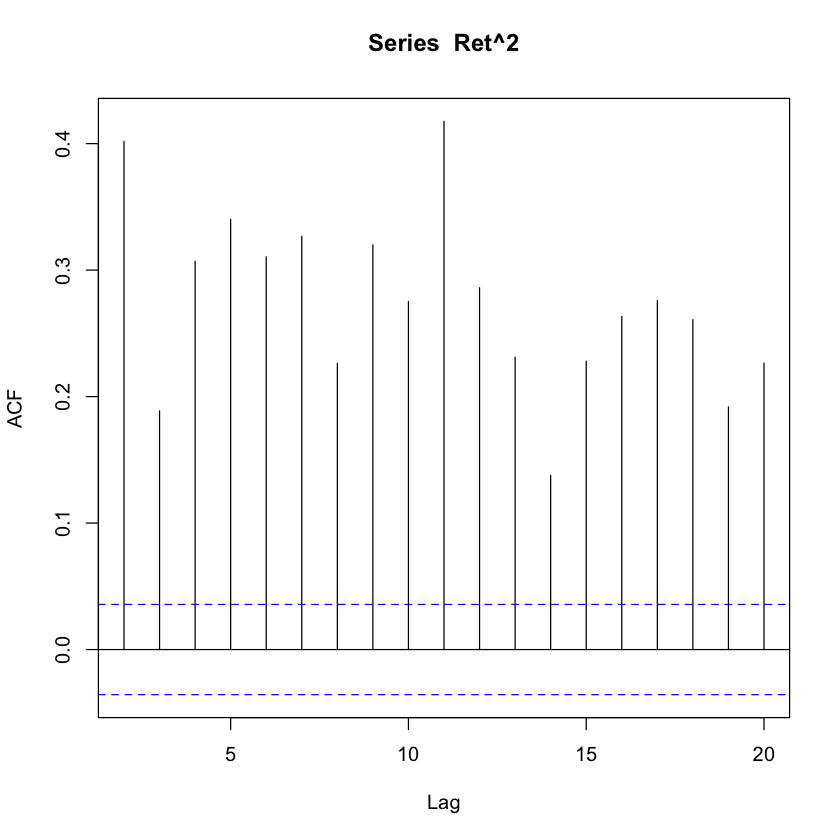

In [6]:
para = 20
q = acf(Ret,para)
plot(q[2:para])
q = acf(Ret^2,para)
plot(q[2:para])
b = Box.test(Ret,lag=para+1,type="Ljung-Box")
print(b)

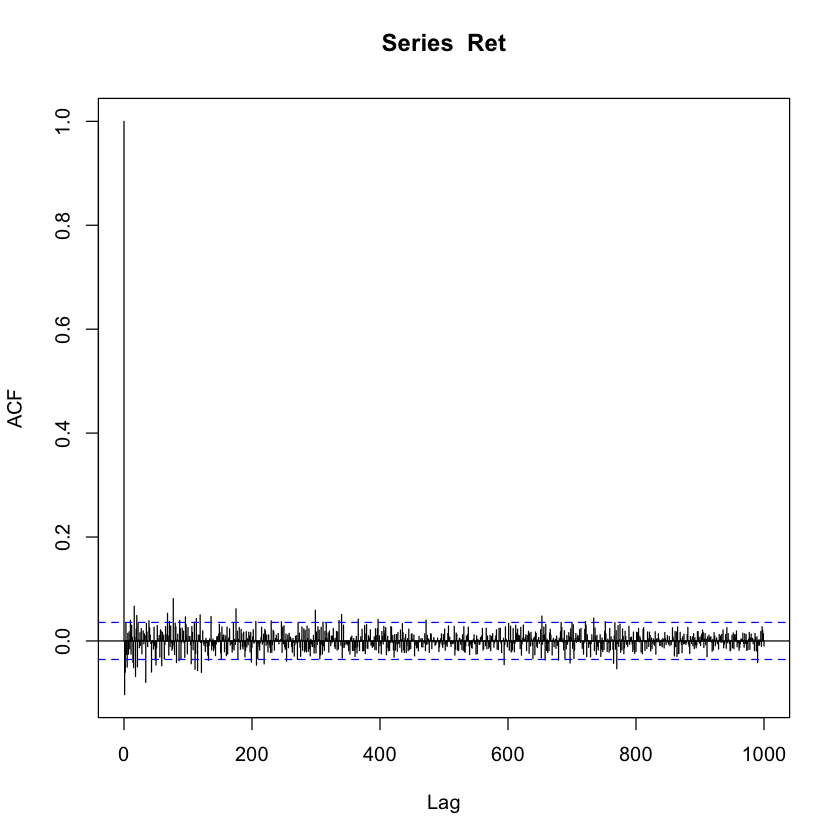

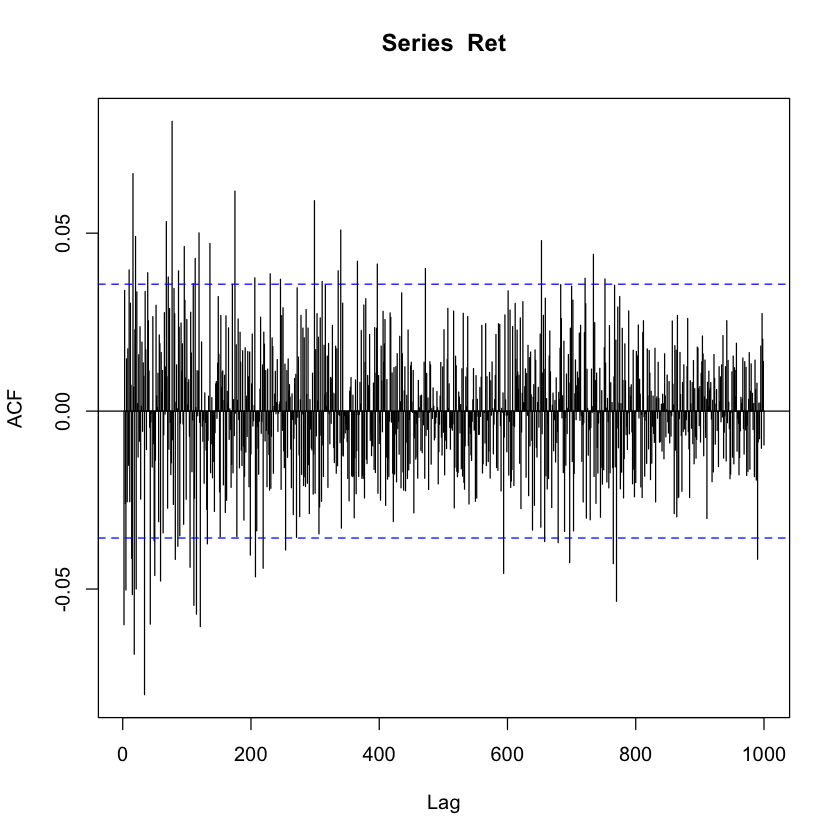

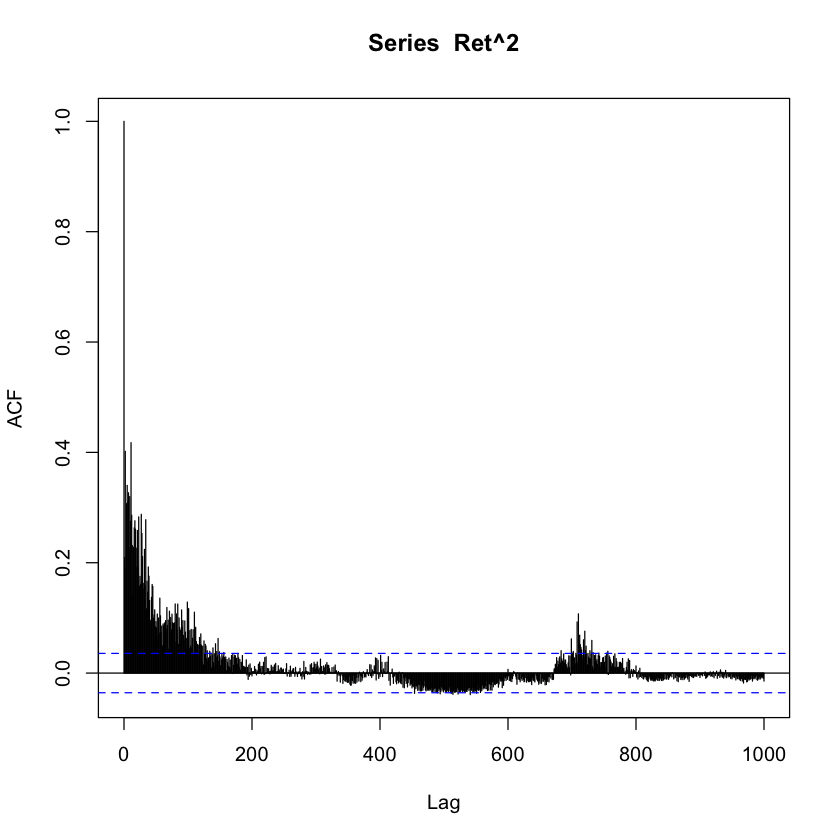


	Box-Ljung test

data:  Ret
X-squared = 1283.4, df = 1001, p-value = 3.056e-09



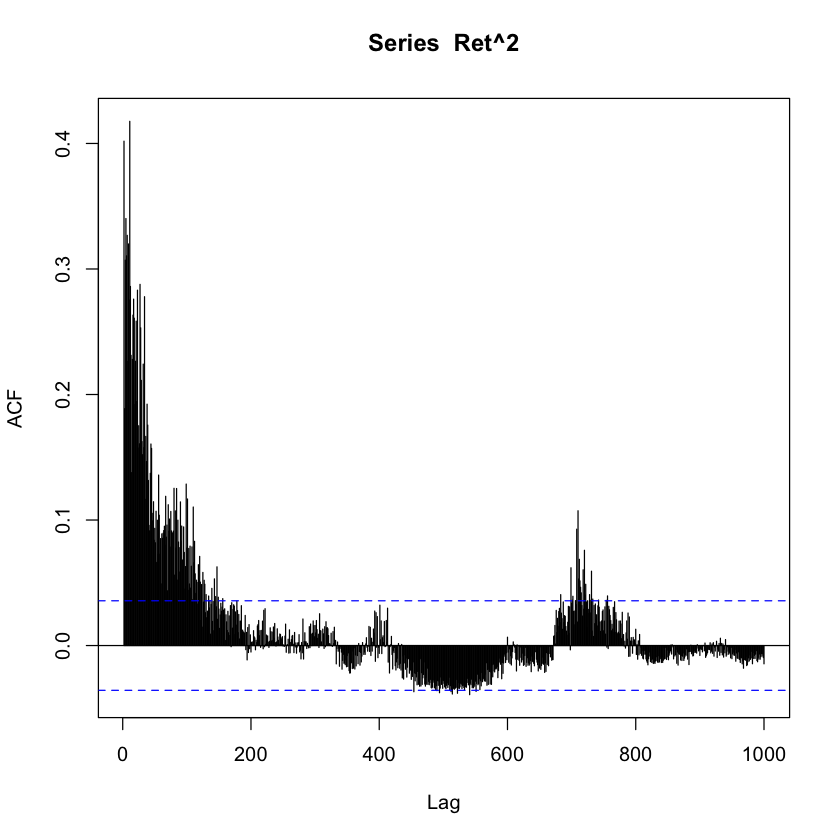

In [7]:
para = 1000
q = acf(Ret,para)
plot(q[2:para])
q = acf(Ret^2,para)
plot(q[2:para])
b = Box.test(Ret,lag=para+1,type="Ljung-Box")
print(b)

[1] 700 711

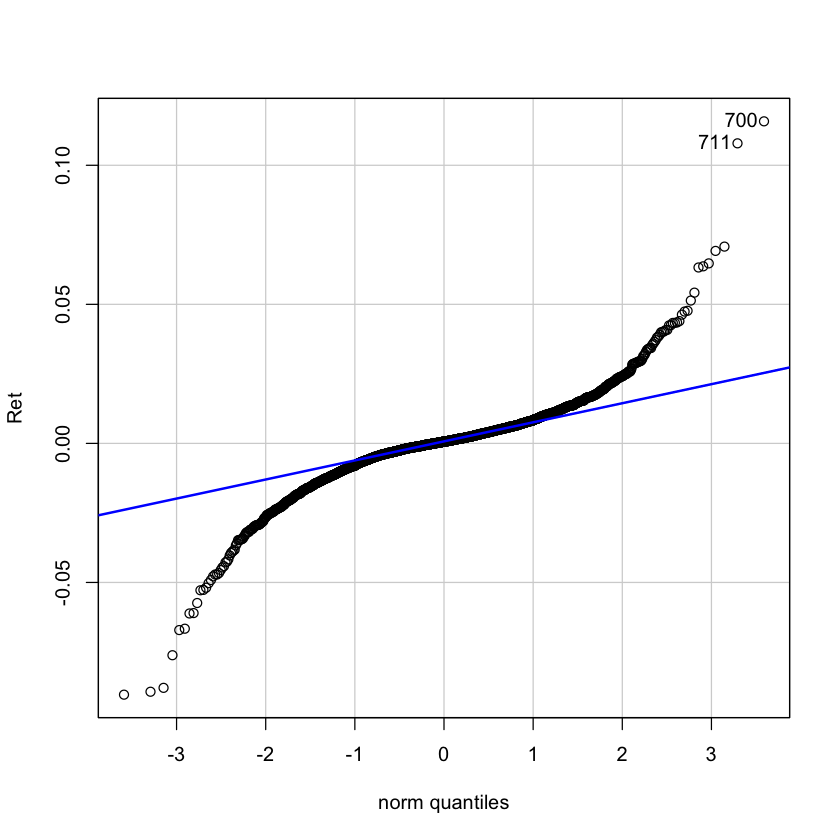

In [8]:
qqPlot(Ret, distribution = "norm", envelope = FALSE)

[1] 700 711

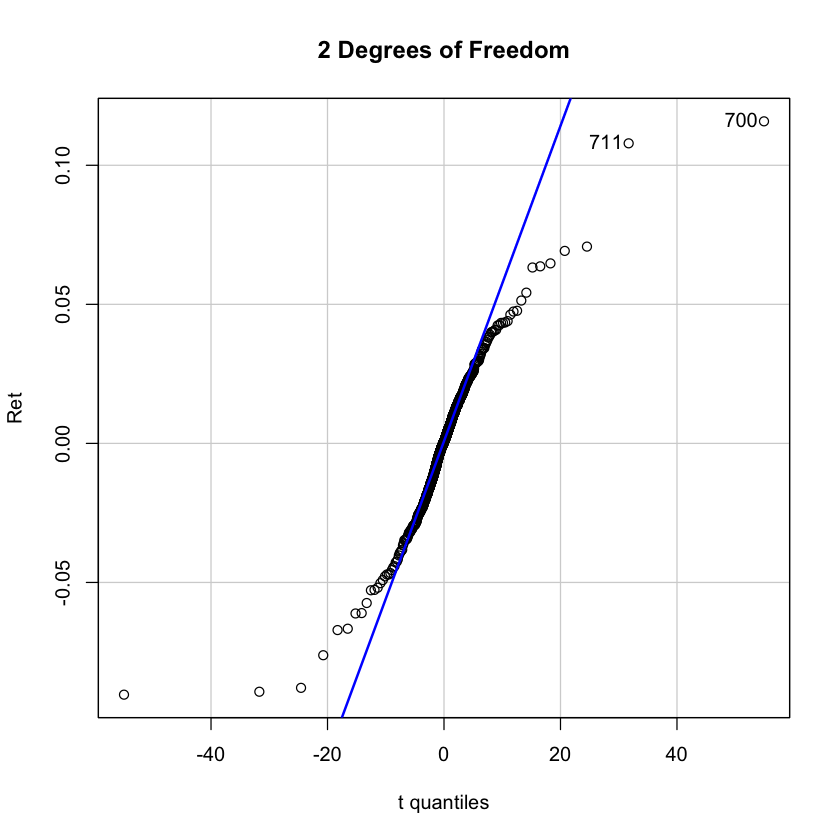

[1] 700 711

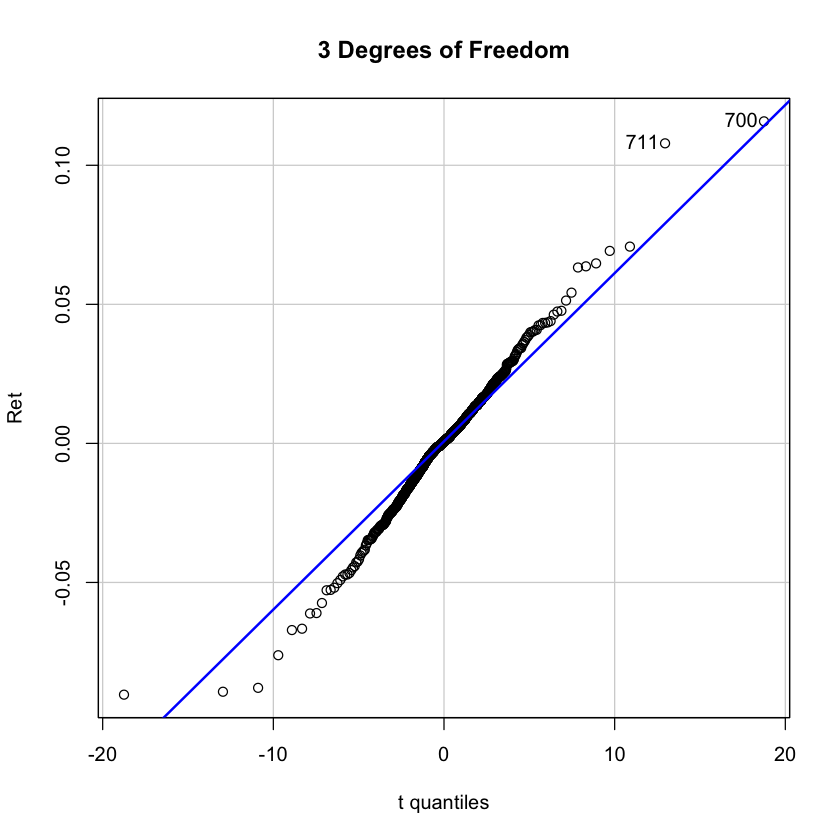

[1] 700 711

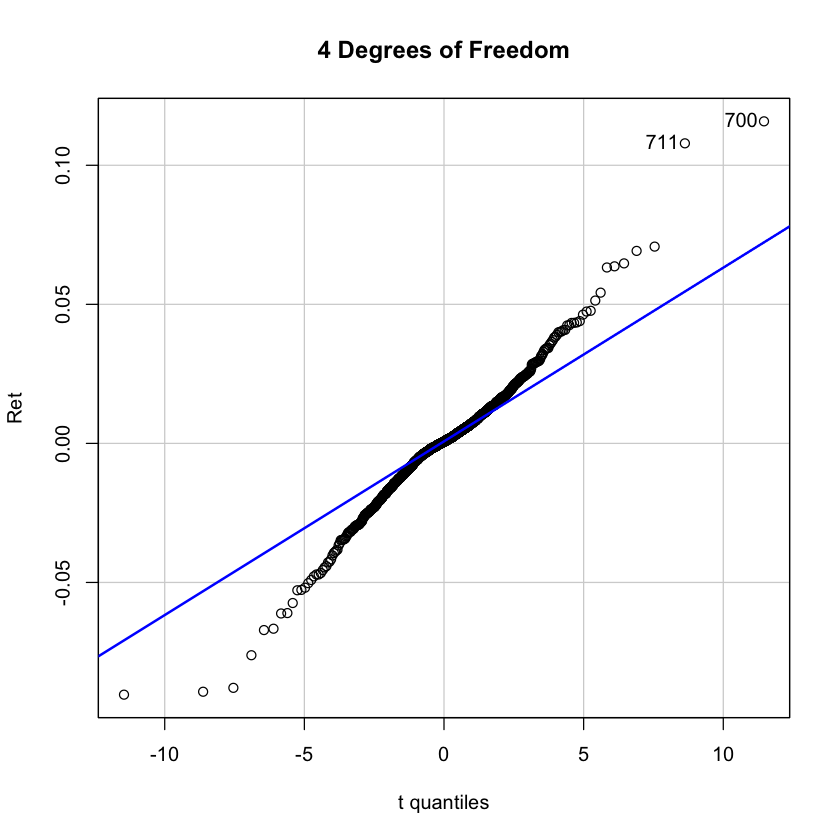

In [9]:
# 2 degrees of freedom
qqPlot(Ret, distribution = "t", df = 2, envelope = FALSE,
      main = "2 Degrees of Freedom")

# 3 degrees of freedom
qqPlot(Ret, distribution = "t", df = 3, envelope = FALSE,
      main = "3 Degrees of Freedom")

# 4 degrees of freedom
qqPlot(Ret, distribution = "t", df = 4, envelope = FALSE,
      main = "4 Degrees of Freedom")